# Tweets (Sältzer)

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import polars as pl
from matplotlib import pyplot as plt
import json
from studienarbeit.utils.cleaning import CleanText
from dotenv import load_dotenv

load_dotenv()

data_dir = Path("../../data/tweets")

sns.set(style="white", palette="muted", rc={"figure.figsize": (20, 8)})
line_kws={"color":"r","alpha":0.7,"lw":5}

## Business Understanding

---

Lorem

## Data Understanding

---

In [2]:
df = pd.read_feather(data_dir / "tweets_full.feather")

In [3]:
df.head()

,screen_name,user_id,status_id,created_at,text,is_retweet,lang,fullname,faction,name,...,Masernimpfpflicht.in.Gemeinschaftseinrichtungen,Gewerbesteuer.abschaffen.und.Körperschaftssteuer.senken,Erhöhung.der.Luftverkehrssteuer,Haushalt.für.die.Bundeskanzlerin.und.das.Bundeskanzleramt,Bundeshaushalt.2020,Einsetzung.einer.Kommission.zur.Reform.der.förderalen.Sicherheitsarchitektur,Umsetzung.des.Klimaschutzprogramms.2030,Abschuss.von.Wölfen.erleichtern,Organspenden.Reform..Widerspruchslösung,Organspenden.Reform..Zustimmungslösung
0,_martinneumann,974589289689427968,1113689713083396099,2019-04-04,Heute werde ich in der Aktuellen Stunde meiner...,FALSE,de,Martin Neumann,27,NA,...,dafür gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt
1,_martinneumann,974589289689427968,1051942785371267073,2018-10-15,"Der geniale Coup der Grünen war und ist es, Wä...",TRUE,de,Martin Neumann,27,NA,...,dafür gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt
2,_martinneumann,974589289689427968,1051884310494621697,2018-10-15,"Klimafreundliche Energie, aber ohne Atomkraftw...",TRUE,de,Martin Neumann,27,NA,...,dafür gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt
3,_martinneumann,974589289689427968,1051934311870545921,2018-10-15,"Die Bürgerinnen und Bürger erwarten kein Geld,...",TRUE,de,Martin Neumann,27,NA,...,dafür gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt
4,_martinneumann,974589289689427968,1052103707825975296,2018-10-16,Auf der Konferenz „Urbane Energielösungen“ von...,TRUE,de,Martin Neumann,27,NA,...,dafür gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt,dagegen gestimmt,dagegen gestimmt,dagegen gestimmt,dafür gestimmt


### Remove Columns

In [4]:
columns = ["screen_name", "user_id", "created_at", "text", "is_retweet", "fullname", "faction", "name", "social", "economic", "hashtags", "party", "birthyear", "followers_count", "list", "gender"]

In [5]:
df_slim = df[columns]

df_slim.head()

,screen_name,user_id,created_at,text,is_retweet,fullname,faction,name,social,economic,hashtags,party,birthyear,followers_count,list,gender
0,_martinneumann,974589289689427968,2019-04-04,Heute werde ich in der Aktuellen Stunde meiner...,FALSE,Martin Neumann,27,NA,NA,NA,Förster,FDP,1956,1257,Landesliste Brandenburg,male
1,_martinneumann,974589289689427968,2018-10-15,"Der geniale Coup der Grünen war und ist es, Wä...",TRUE,Martin Neumann,27,NA,NA,NA,Förster,FDP,1956,1257,Landesliste Brandenburg,male
2,_martinneumann,974589289689427968,2018-10-15,"Klimafreundliche Energie, aber ohne Atomkraftw...",TRUE,Martin Neumann,27,NA,NA,NA,Förster,FDP,1956,1257,Landesliste Brandenburg,male
3,_martinneumann,974589289689427968,2018-10-15,"Die Bürgerinnen und Bürger erwarten kein Geld,...",TRUE,Martin Neumann,27,NA,NA,NA,Förster,FDP,1956,1257,Landesliste Brandenburg,male
4,_martinneumann,974589289689427968,2018-10-16,Auf der Konferenz „Urbane Energielösungen“ von...,TRUE,Martin Neumann,27,NA,NA,NA,Förster,FDP,1956,1257,Landesliste Brandenburg,male


### Replace and Convert Values

In [6]:
for col in columns:
    df_slim[col] = df_slim[col].apply(lambda x: None if x == "NA" or x == "NA, NA" or x == "NA, NA, NA, NA, NA, NA, NA, NA" else x)

/tmp/ipykernel_24327/503971307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slim[col] = df_slim[col].apply(lambda x: None if x == "NA" or x == "NA, NA" or x == "NA, NA, NA, NA, NA, NA, NA, NA" else x)


In [7]:
category_col = [col for col in df_slim.columns if df_slim[col].nunique() <= 15]
category_col_values = {
    col: df_slim[col].value_counts().to_dict() 
    for col in df_slim.columns if df_slim[col].nunique() <= 15
}

with open("out/category_col_values.json", "w") as f:
    json.dump(category_col_values, f)
    
print(category_col)

['is_retweet', 'social', 'economic', 'party', 'gender']


In [8]:
convert_dict = {
  "screen_name": "string",
  "user_id": "string",
  "created_at": "string", # TODO: Convert to datetime
  "text": "string",
  "is_retweet": "bool",
  "fullname": "string",
  "faction": "float16",
  "name": "string",
  "social": "float16",
  "economic": "float16",
  "hashtags": "string", # TODO: Convert to list
  "followers_count": "float32",
  "party": "category",
  "birthyear": "float32",
  "list": "string",
  "gender": "category",
}

In [9]:
df_slim = df_slim.astype(convert_dict)

In [10]:
df_slim.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876118 entries, 0 to 876117
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   screen_name      876118 non-null  string  
 1   user_id          876118 non-null  string  
 2   created_at       876118 non-null  string  
 3   text             865076 non-null  string  
 4   is_retweet       876118 non-null  bool    
 5   fullname         876118 non-null  string  
 6   faction          787386 non-null  float16 
 7   name             396902 non-null  string  
 8   social           396902 non-null  float16 
 9   economic         396902 non-null  float16 
 10  hashtags         378562 non-null  string  
 11  party            876118 non-null  category
 12  birthyear        865352 non-null  float32 
 13  followers_count  876118 non-null  float32 
 14  list             816241 non-null  string  
 15  gender           876118 non-null  category
dtypes: bool(1), category

In [11]:
print(df_slim["text"].isna().sum())

df_slim = df_slim.dropna(subset=["text"])

11042


## Data Preparation

---

### Clean Text

In [12]:
# clean = CleanText()

# df_slim["clean_text"] = df_slim["text"].apply(lambda x: clean.pipeline(x, True))

In [13]:
len(df_slim["screen_name"].unique())

511

<AxesSubplot: xlabel='party', ylabel='count'>

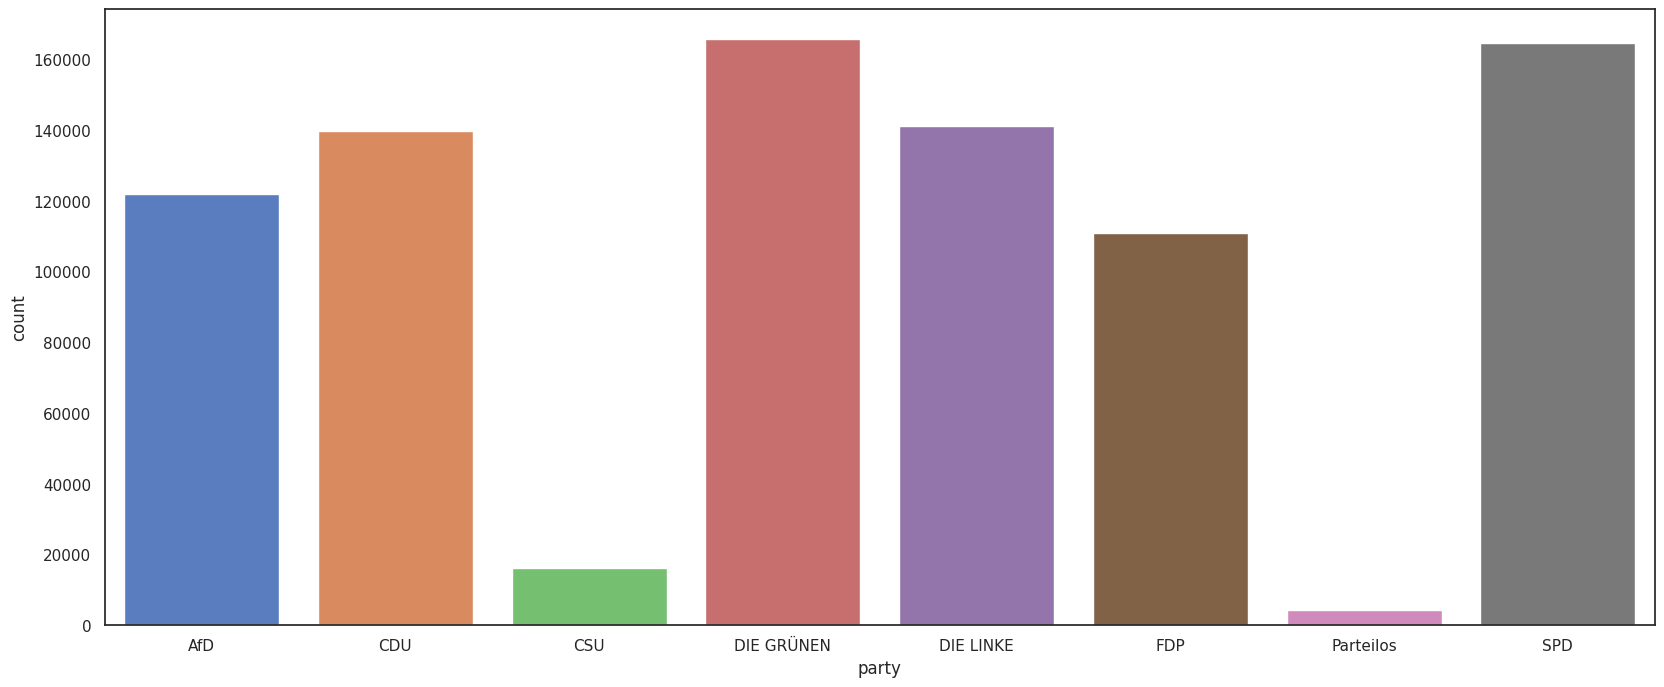

In [14]:
sns.countplot(x="party", data=df_slim)

In [24]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [26]:
clean = CleanText()

df_slim["lemma_text"] = df_slim["text"].parallel_apply(lambda x: clean.pipeline(x, True))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/felixhoffmnn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/felixhoffmnn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
df_slim.head()

,screen_name,user_id,created_at,text,is_retweet,fullname,faction,name,social,economic,hashtags,party,birthyear,followers_count,list,gender,lemma_text
0,_martinneumann,974589289689427968,2019-04-04,Heute werde ich in der Aktuellen Stunde meiner...,True,Martin Neumann,27.0,<NA>,NaN,NaN,Förster,FDP,1956.0,1257.0,Landesliste Brandenburg,male,(heute werde ich in der aktuellen stunde meine...
1,_martinneumann,974589289689427968,2018-10-15,"Der geniale Coup der Grünen war und ist es, Wä...",True,Martin Neumann,27.0,<NA>,NaN,NaN,Förster,FDP,1956.0,1257.0,Landesliste Brandenburg,male,(der geniale coup der grünen war und ist es wä...
2,_martinneumann,974589289689427968,2018-10-15,"Klimafreundliche Energie, aber ohne Atomkraftw...",True,Martin Neumann,27.0,<NA>,NaN,NaN,Förster,FDP,1956.0,1257.0,Landesliste Brandenburg,male,(klimafreundliche energie aber ohne atomkraftw...
3,_martinneumann,974589289689427968,2018-10-15,"Die Bürgerinnen und Bürger erwarten kein Geld,...",True,Martin Neumann,27.0,<NA>,NaN,NaN,Förster,FDP,1956.0,1257.0,Landesliste Brandenburg,male,(die bürgerinnen und bürger erwarten kein geld...
4,_martinneumann,974589289689427968,2018-10-16,Auf der Konferenz „Urbane Energielösungen“ von...,True,Martin Neumann,27.0,<NA>,NaN,NaN,Förster,FDP,1956.0,1257.0,Landesliste Brandenburg,male,(auf der konferenz „urbane energielösungen von...
